# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

Data description              
● **city:** city this user signed up in               
● **phone:** primary device for this user                              
● **signup_date:** date of account registration; in the form ‘YYYYMMDD’               
● **last_trip_date:** the last time this user completed a trip; in the form ‘YYYYMMDD’                   
● **avg_dist:** the average distance in miles per trip taken in the first 30 days after signup      
● **avg_rating_by_driver:** the rider’s average rating over all of their trips         
● **avg_rating_of_driver:** the rider’s average rating of their drivers over all of their trips                
● **surge_pct:** the percent of trips taken with surge multiplier > 1            
● **avg_surge:** The average surge multiplier over all of this user’s trips      
● **trips_in_first_30_days:** the number of trips this user took in the first 30 days after signing up             
● **ultimate_black_user:** TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise            
● **weekday_pct:** the percent of the user’s trips occurring during a weekday

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from datetime import datetime

In [2]:
df = pd.read_json('ultimate_data_challenge.json',convert_dates=['last_trip_date', 'signup_date'])

In [3]:
df.head().T

,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25 00:00:00,2014-01-29 00:00:00,2014-01-06 00:00:00,2014-01-10 00:00:00,2014-01-27 00:00:00
avg_rating_of_driver,4.7,5.0,4.3,4.6,4.4
avg_surge,1.1,1.0,1.0,1.14,1.19
last_trip_date,2014-06-17 00:00:00,2014-05-05 00:00:00,2014-01-07 00:00:00,2014-06-29 00:00:00,2014-03-15 00:00:00
phone,iPhone,Android,iPhone,iPhone,Android
surge_pct,15.4,0.0,0.0,20.0,11.8
ultimate_black_user,True,False,False,True,False
weekday_pct,46.2,50.0,100.0,80.0,82.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

#### Active vs Not Active in last 30 days

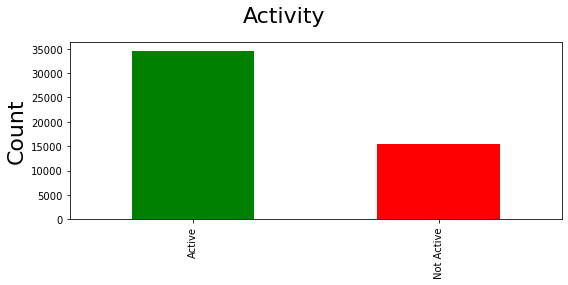

In [5]:
result = []
for n in df['trips_in_first_30_days']:
    if n > 0:
        result.append("Active")
    else:
        result.append("Not Active")
      
df["activity"] = result


c = ['green','red']
plt.suptitle('Activity', fontsize=22)
plt.ylabel('ylabel', fontsize=22)
df['activity'].value_counts().plot(kind='bar',color=c,figsize=(8, 4), ylabel='Count')
plt.tight_layout()

#### I am going to work only with active customers

In [6]:
df['activity'].value_counts()

Active        34610
Not Active    15390
Name: activity, dtype: int64

In [7]:
df.head().T

,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25 00:00:00,2014-01-29 00:00:00,2014-01-06 00:00:00,2014-01-10 00:00:00,2014-01-27 00:00:00
avg_rating_of_driver,4.7,5.0,4.3,4.6,4.4
avg_surge,1.1,1.0,1.0,1.14,1.19
last_trip_date,2014-06-17 00:00:00,2014-05-05 00:00:00,2014-01-07 00:00:00,2014-06-29 00:00:00,2014-03-15 00:00:00
phone,iPhone,Android,iPhone,iPhone,Android
surge_pct,15.4,0.0,0.0,20.0,11.8
ultimate_black_user,True,False,False,True,False
weekday_pct,46.2,50.0,100.0,80.0,82.4


Visualizing correlation between features

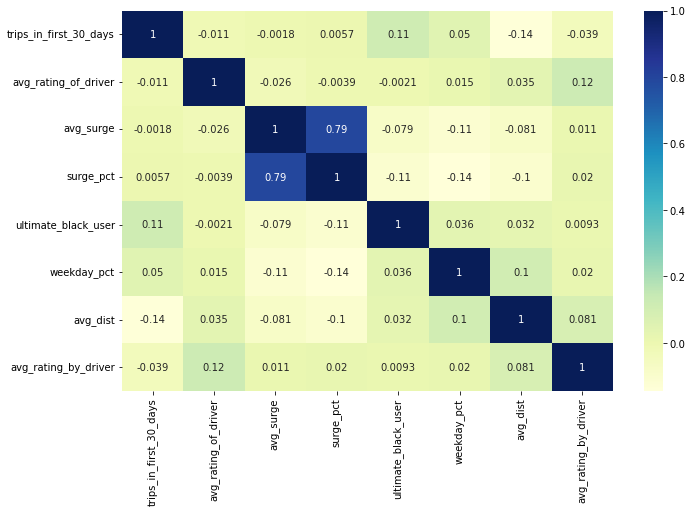

In [8]:
sns.heatmap(df.corr(), yticklabels=True, annot=True, cmap="YlGnBu")
plt.gcf().set_size_inches(11, 7)

I will do scatter plot between avg_rating_by_driver' and 'avg_rating_of_driver.       
Scatter plots can show the correlation, between the values of observed quantities.

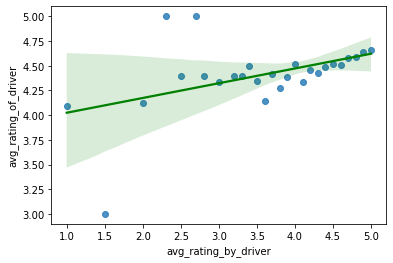

In [9]:
rd = df.groupby(by='avg_rating_by_driver', axis=0, as_index=False, sort=True, group_keys=True).mean()

sns.regplot(x='avg_rating_by_driver', y='avg_rating_of_driver', data=rd, line_kws={"color": "g"})
plt.xlabel('avg_rating_by_driver')
plt.ylabel('avg_rating_of_driver');

I am going to remove columns that not going to be used

In [10]:
df = df.drop(['last_trip_date', 'phone', 'signup_date'], axis=1)
df.head().T

,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
avg_rating_of_driver,4.7,5.0,4.3,4.6,4.4
avg_surge,1.1,1.0,1.0,1.14,1.19
surge_pct,15.4,0.0,0.0,20.0,11.8
ultimate_black_user,True,False,False,True,False
weekday_pct,46.2,50.0,100.0,80.0,82.4
avg_dist,3.67,8.26,0.77,2.36,3.13
avg_rating_by_driver,5.0,5.0,5.0,4.9,4.9
activity,Active,Not Active,Active,Active,Active


Creating dummy encode all the categorical variables

In [11]:
df_d = pd.get_dummies(df, columns=['ultimate_black_user', 'city'], drop_first=True)

In [12]:
df_d = pd.get_dummies(df_d, columns=['activity'])
df_d.head().T

,0,1,2,3,4
trips_in_first_30_days,4.00,0.00,3.00,9.00,14.00
avg_rating_of_driver,4.70,5.00,4.30,4.60,4.40
avg_surge,1.10,1.00,1.00,1.14,1.19
surge_pct,15.40,0.00,0.00,20.00,11.80
weekday_pct,46.20,50.00,100.00,80.00,82.40
avg_dist,3.67,8.26,0.77,2.36,3.13
avg_rating_by_driver,5.00,5.00,5.00,4.90,4.90
ultimate_black_user_True,1.00,0.00,0.00,1.00,0.00
city_King's Landing,1.00,0.00,0.00,1.00,0.00
city_Winterfell,0.00,0.00,0.00,0.00,1.00


Checking NaN

In [13]:
df_d.isna().sum()

trips_in_first_30_days         0
avg_rating_of_driver        8122
avg_surge                      0
surge_pct                      0
weekday_pct                    0
avg_dist                       0
avg_rating_by_driver         201
ultimate_black_user_True       0
city_King's Landing            0
city_Winterfell                0
activity_Active                0
activity_Not Active            0
dtype: int64

Droping all the NaNs

In [14]:
df_clean = df_d.dropna(axis='columns')
df_clean.isna().sum()

trips_in_first_30_days      0
avg_surge                   0
surge_pct                   0
weekday_pct                 0
avg_dist                    0
ultimate_black_user_True    0
city_King's Landing         0
city_Winterfell             0
activity_Active             0
activity_Not Active         0
dtype: int64

In [15]:
import warnings
warnings.filterwarnings("ignore")

# Lets do Logistic Regression

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

In [18]:
X = df_clean.drop(columns = ['activity_Active', 'activity_Not Active'])
y = df_clean['activity_Active']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

LogR_model = LogisticRegression()

LogR_model.fit(x_train, y_train)

predictions_LogR = LogR_model.predict(x_test)

In [19]:
# Create confusion matrix
confusion_matrix(y_test, predictions_LogR)

array([[3068,    0],
       [   0, 6932]], dtype=int64)

In [20]:
#  accuracy score
print(accuracy_score(y_test, predictions_LogR))
#  F1 score
print(f1_score(y_test,predictions_LogR))

1.0
1.0


In [21]:
print(accuracy_score(LogR_model.predict(x_test), y_test))

print(classification_report(y_test, predictions_LogR))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3068
           1       1.00      1.00      1.00      6932

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [84]:
X = df_clean.drop(columns = ['activity_Active', 'activity_Not Active'])
y = df_clean['activity_Active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


LR_mod = LogisticRegression(max_iter = 10000)

grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

LR_GS = GridSearchCV(LR_mod, grid, cv = 10)

LR_GS.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [85]:
print("tuned hpyerparameters :(best parameters) ",LR_GS.best_params_)
print("accuracy :",LR_GS.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001}
accuracy : 0.692375


# Random Forest Classifier

In [23]:
X = df_clean.drop(columns = ['activity_Active', 'activity_Not Active'])
y = df_clean['activity_Active']

RF_m = RandomForestClassifier(n_estimators = 500, max_depth = 2, 
                             max_features = 3, bootstrap = True, random_state = 18).fit(x_train, y_train)

prediction_RF = RF_m.predict(x_test)

In [24]:
# Create confusion matrix
confusion_matrix(y_test, prediction_RF)

array([[3068,    0],
       [   0, 6932]], dtype=int64)

In [25]:
#  accuracy score
print(accuracy_score(y_test, prediction_RF))
#  F1 score
print(f1_score(y_test,prediction_RF))

1.0
1.0


In [26]:
print(accuracy_score(RF_m.predict(x_test), y_test))

print(classification_report(y_test, prediction_RF))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3068
           1       1.00      1.00      1.00      6932

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [53]:
from sklearn.model_selection import GridSearchCV

In [62]:
X = df_clean.drop(columns = ['activity_Active', 'activity_Not Active'])
y = df_clean['activity_Active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

n_estimators = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
max_depth = [20]
min_samples_split = [2, 5, 15, 30]
min_samples_leaf = [10]

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

RF_mod = RandomForestClassifier()

RF_GS = GridSearchCV(estimator = RF_mod, param_grid = param_grid, verbose=2, cv=4, n_jobs=1)

RF_GS.fit(X_train, y_train)

RF_GS.best_params_

Fitting 4 folds for each of 28 candidates, totalling 112 fits
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=0.001; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=0.001; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=0.001; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=0.001; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=0.01; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=0.01; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=0.01; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=0.01; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=2, n_estimators=0.1; total time=   0.0s
[CV] END

[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=  42.5s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=  48.2s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=  38.5s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=  37.4s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=30, n_estimators=0.001; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=30, n_estimators=0.001; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=30, n_estimators=0.001; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=30, n_estimators=0.001; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_split=30, n_estimators=0.01; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=10, min_samples_spli

{'max_depth': 20,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 10}

In [63]:
print(f'Train Accuracy - : {RF_GS.score(X_train, y_train):.3f}')

print(f'Test Accuracy - : {RF_GS.score(X_test, y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 1.000


In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

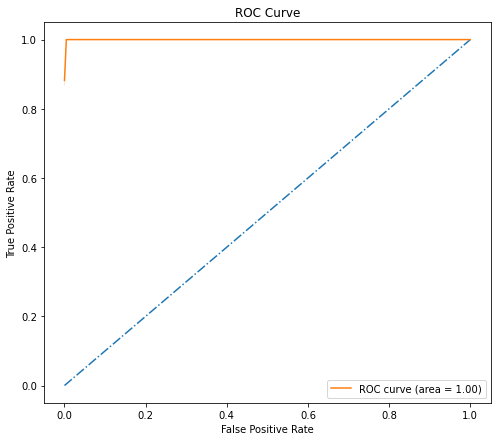

In [73]:
X = df_clean.drop(columns = ['activity_Active', 'activity_Not Active'])
y = df_clean['activity_Active']

roc_model = RF_GS.best_estimator_.fit(X_train, y_train)

p_p = roc_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, p_p)
auc_score = roc_auc_score(y_test, p_p)

_ = sns.lineplot(x=[0,1], y=[0,1], linestyle='-.')
_ = sns.lineplot(x=fpr, y=tpr, label='ROC curve (area = %0.2f)' % auc_score)
_ = plt.gcf().set_size_inches(8, 7)
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.legend(loc="lower right")

# ANOTHER WAY - Logistic Regression

In [27]:
ANOTHER = pd.read_json('ultimate_data_challenge.json',convert_dates=['last_trip_date', 'signup_date'])

In [28]:
result = []
for n in ANOTHER['trips_in_first_30_days']:
    if n > 0:
        result.append("Active")
    else:
        result.append("Not Active")
      
ANOTHER["activity"] = result

In [29]:
ANOTHER = ANOTHER.dropna(axis='columns')
ANOTHER.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_surge                 0
last_trip_date            0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
activity                  0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
#Encode Categories
ANOTHER.city = LabelEncoder().fit_transform(ANOTHER.city)
ANOTHER.ultimate_black_user = LabelEncoder().fit_transform(ANOTHER.ultimate_black_user)
ANOTHER.active_status = LabelEncoder().fit_transform(ANOTHER.activity)

In [32]:
ANOTHER.head().T

,0,1,2,3,4
city,1,0,0,1,2
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25 00:00:00,2014-01-29 00:00:00,2014-01-06 00:00:00,2014-01-10 00:00:00,2014-01-27 00:00:00
avg_surge,1.1,1.0,1.0,1.14,1.19
last_trip_date,2014-06-17 00:00:00,2014-05-05 00:00:00,2014-01-07 00:00:00,2014-06-29 00:00:00,2014-03-15 00:00:00
surge_pct,15.4,0.0,0.0,20.0,11.8
ultimate_black_user,1,0,0,1,0
weekday_pct,46.2,50.0,100.0,80.0,82.4
avg_dist,3.67,8.26,0.77,2.36,3.13
activity,Active,Not Active,Active,Active,Active


In [33]:
X = ANOTHER.drop(columns = ['activity', 'last_trip_date','signup_date'])
y = ANOTHER['activity']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [35]:
#Scaler
x_train = QuantileTransformer().fit_transform(x_train)
x_test = QuantileTransformer().fit_transform(x_test)

In [36]:
#Create model
model11 = LogisticRegression()

#Fit the model on the training data
model11.fit(x_train, y_train)

LogisticRegression()

In [42]:
predictions_2 = model11.predict(x_test)

#Print the accuracy score and classification report from the testing data
print(accuracy_score(model11.predict(x_test), y_test))

print(classification_report(y_test, predictions_2))

1.0
              precision    recall  f1-score   support

      Active       1.00      1.00      1.00      6859
  Not Active       1.00      1.00      1.00      3141

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [82]:
X = ANOTHER.drop(columns = ['activity', 'last_trip_date','signup_date'])
y = ANOTHER['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


LR_mod = LogisticRegression(max_iter = 10000)

grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

LR_GS = GridSearchCV(LR_mod, grid, cv = 10)

LR_GS.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [83]:
print("tuned hpyerparameters :(best parameters) ",LR_GS.best_params_)
print("accuracy :",LR_GS.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001}
accuracy : 0.694625
